Project : Stock Policy
Author  : Ren-der Chao
Date    : 2017-06-23

- [0.Prepare data for classification](#0.Prepare-data-for-classification)
- [1.PPN:Training a perceptron](#1.PPN:Training-a-perceptron)
- [2.LR:Logistic Regression Model](#2.LR:Logistic-Regression-Model)
- [3.SVM:Support Vector Machines](#3.SVM:Support-Vector-Machines)
- [4.TREE:Decision tree learning](#4.TREE:Decision-tree-learning)
    - [Building a decision tree](#Building-a-decision-tree)
    - [Visualize a decision tree](#Visualize-a-decision-tree)
- [5.FOREST:Random forests](#5.FOREST:Random-forests)
    - [Assessing feature importances with Random Forests](#Assessing-feature-importances-with-Random-Forests)
- [6.KNN:K nearest neighbors](#6.KNN:K-nearest-neighbors)
    - [Sequential feature selection algorithms:SBS](#Sequential-feature-selection-algorithms:SBS)

- [7.Model Evaluation and Hyperparameter Turning](#7.Model-Evaluation-and-Hyperparameter-Turning)    
    - [Streamlining workflows with pipelines:P163](#Streamlining-workflows-with-pipelines:P163)

    - [Using k fold cross validation to assess model performance:P170](#Using-k-fold-cross-validation-to-assess-model-performance:P170)
    - [Diagnosing bias and variance problems with learning curves:P171](#Diagnosing-bias-and-variance-problems-with-learning-curves:P171)
    - [Bagging:building an ensemble of classifiers from bootstrap samples](#Bagging:Building-an-ensemble-of-classifiers-from-bootstrap-samples)
- [8.Pickle classification models](#8.Pickle-classification-models)
  - [Pickle dump the classifiers](#Pickle-dump-the-classifiers)
  - [Pickle load the classifiers](#Pickle-load-the-classifiers)



# Final Project - A Tour of Machine Learning Classifiers Using Scikit-Learn

# 0.Prepare data for classification

In [123]:
from IPython.display import Image
%matplotlib inline

In [124]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

## Loading dataset from scikit-learn. 
### the 1-18 columns:  財務指標
### the 19 column   :  Good/勝率贏大盤, Bad/勝率輸大盤 

In [125]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn import datasets
import numpy as np

#iris = datasets.load_iris()
#X = iris.data[:, [2, 3]]
#y = iris.target

##############################################
### Step 1: Read data for stock forcasting ###
##############################################
import pandas as pd
mydata = pd.read_excel('./mystock.xls', head = 1)
mydata.columns = ['A1','A2','A3','A4','B1','B2','B3','C1','C2','D1','D2','E1','E2','F1','G1','G2','G3','G4','mark']
#mydata
mydata.shape
y_index = mydata.shape[1] - 1
y_index
#mydata.values
#X=mydata.values[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]]
X=mydata.iloc[:, 0:y_index].values
X
y=mydata.iloc[:, y_index].values
#=mydata.values[:, [y_index]]
y
#print('Class labels:', np.unique(y))


(682, 19)

18

array([[  -0.37,   10.33,  299.28, ...,    0.93,    1.08,    0.7 ],
       [   0.68,    6.09,  233.83, ...,    0.68,    1.39,    0.69],
       [ -29.74,   14.47,  -23.23, ...,    0.6 ,    2.61,    0.67],
       ..., 
       [  18.71,   20.48,  331.4 , ...,    0.76,    0.71,    0.82],
       [  -5.67,   -5.4 ,  -12.57, ...,    0.58,    0.56,    0.71],
       [   7.16,    8.57,  311.59, ...,    0.79,    0.61,    0.74]])

array(['Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good',
       'Bad', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Good',
       'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good',
       'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad',
       'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'B

## Splitting data into 70% training and 30% test data:

In [126]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    
##################################################################
### Step 2: Splitting data into 70% training and 30% test data ###
##################################################################
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

## Standardizing the features:

In [127]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##################################################################
### Step 3: Standardizing the features                         ###
##################################################################
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

# 1.PPN:Training a perceptron

Redefining the `plot_decision_region` function from chapter 2:

In [128]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

y_train.shape
y_pred_train = ppn.predict(X_train_std)
print('Misclassified samples: %d' % (y_train != y_pred_train).sum())

y_test.shape
y_pred_test = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred_test).sum())

print('==================================')
print('Training accuracy:', ppn.score(X_train, y_pred_train))
print('Test accuracy:', ppn.score(X_test, y_pred_test))


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

(477,)

Misclassified samples: 149


(205,)

Misclassified samples: 72
Training accuracy: 0.626834381551
Test accuracy: 0.614634146341


# 2.LR:Logistic Regression Model

In [129]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Training accuracy: 0.842767295597
Test accuracy: 0.8


# 3.SVM:Support Vector Machines

In [130]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

print('Training accuracy:', svm.score(X_train_std, y_train))
print('Test accuracy:', svm.score(X_test, y_test))


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

Training accuracy: 0.840670859539
Test accuracy: 0.721951219512


# 4.TREE:Decision tree learning

## Building a decision tree

In [131]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print('Training accuracy:', tree.score(X_train, y_train))
print('Test accuracy:', tree.score(X_test, y_test))


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

Training accuracy: 0.85534591195
Test accuracy: 0.8


In [132]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.tree import export_graphviz

export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=list(['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'C1', 'C2', 'D1', 'D2', 'E1', 'E2', 'F1', 'G1', 'G2', 'G3', 'G4']))
                #feature_names=list(mydata.columns[:18]))

## Visualize a decision tree

In [133]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import subprocess

def visualize_tree(tree, my_feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("tree.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=my_feature_names)

    #command = "dot -Tpng tree.dot -o tree.png"
    command = ["dot", "-Tpng", "tree.dot", "-o", "tree.png"]
    #print("do command", command, sep="\n")
    subprocess.check_call(command)
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [134]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

features = list(mydata.columns[:18])
print("* features:", features, sep="\n")
visualize_tree(tree, features)

* features:
['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'C1', 'C2', 'D1', 'D2', 'E1', 'E2', 'F1', 'G1', 'G2', 'G3', 'G4']


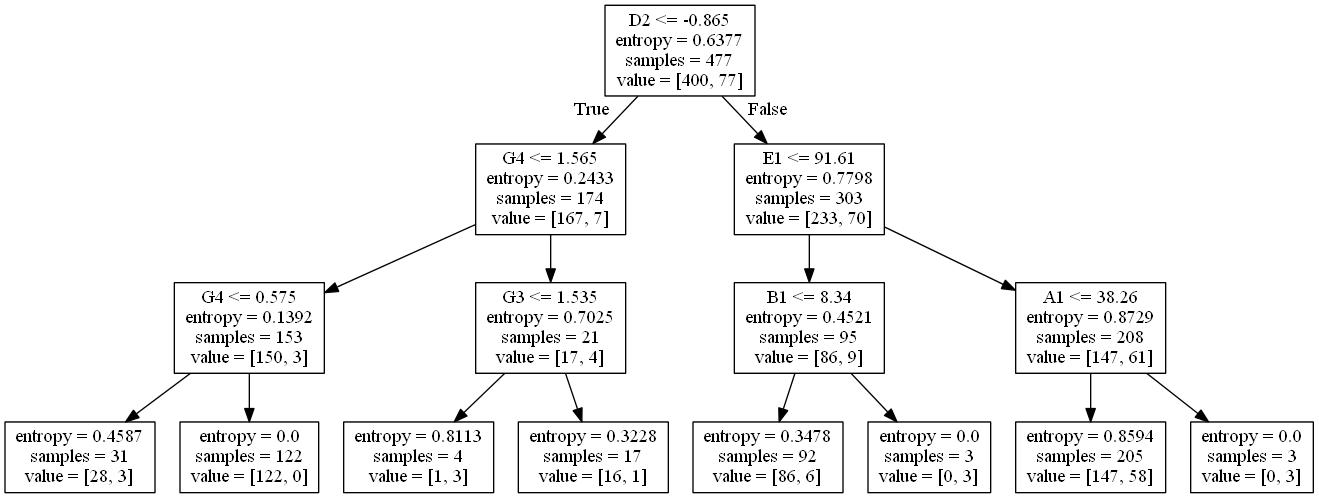

In [135]:
Image(filename='./tree.png', width=600)

<br>
<br>

**Note**

If you have scikit-learn 0.18 and pydotplus installed (e.g., you can install it via `pip install pydotplus`), you can also show the decision tree directly without creating a separate dot file as shown below. Also note that `sklearn 0.18` offers a few additional options to make the decision tree visually more appealing.

# 5.FOREST:Random forests

In [136]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
print('Training accuracy:', forest.score(X_train_std, y_train))
print('Test accuracy:', forest.score(X_test_std, y_test))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

Training accuracy: 0.830188679245
Test accuracy: 0.809756097561


## Assessing feature importances with Random Forests

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

 1) D2                             0.089224
 2) E1                             0.066921
 3) A1                             0.061804
 4) B3                             0.058331
 5) F1                             0.056922
 6) D1                             0.056894
 7) B1                             0.056756
 8) C2                             0.056687
 9) G4                             0.055119
10) B2                             0.053910
11) A4                             0.053823
12) G2                             0.051342
13) A2                             0.049958
14) E2                             0.049356
15) A3                             0.049247
16) G3                             0.046318
17) C1                             0.044165
18) G1                             0.043223


<Container object of 18 artists>

([<matplotlib.axis.XTick at 0xc51b668>,
 <a list of 18 Text xticklabel objects>)

(-1, 18)

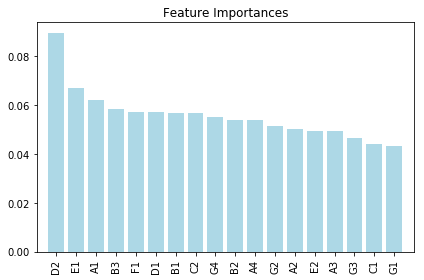

In [137]:
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.ensemble import RandomForestClassifier

feat_labels = mydata.columns[0:]

forest2 = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest2.fit(X_train, y_train)
importances = forest2.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

# 6.KNN:K nearest neighbors

In [138]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

Training accuracy: 0.884696016771
Test accuracy: 0.79512195122


## Sequential feature selection algorithms:SBS

In [139]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

(0.7, 1.1)

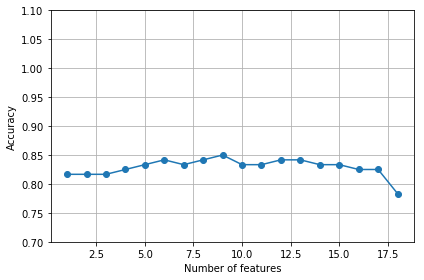

In [140]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(n_neighbors=2)

# selecting features
sbs = SBS(knn2, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('./sbs.png', dpi=300)
plt.show()

In [141]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

k9 = list(sbs.subsets_[9])
print(mydata.columns[0:][k9])

Index(['A1', 'A2', 'A3', 'A4', 'B2', 'B3', 'C1', 'D2', 'F1'], dtype='object')


In [142]:
knn.fit(X_train_std[:, k9], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k9], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k9], y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

Training accuracy: 0.884696016771
Test accuracy: 0.8


# 7.Model Evaluation and Hyperparameter Turning

## Streamlining workflows with pipelines:P163

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

pipe_tree = Pipeline([('scl', StandardScaler()),
                    ('clf', DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0))])

pipe_tree.fit(X_train, y_train)
print('Training Accuracy: %.3f' % pipe_tree.score(X_train, y_train))
print('Test accuracy:%.3f' % pipe_tree.score(X_test, y_test))


Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'))])

Training Accuracy: 0.855
Test accuracy:0.800


## Looking at different performance evaluation metrics

In [112]:
from sklearn.metrics import confusion_matrix

pipe_tree.fit(X_train, y_train)
y_test_pred = pipe_tree.predict(X_test)
confmat_test = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(confmat_test)

y_train_pred = pipe_tree.predict(X_train)
confmat_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
print(confmat_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'))])

[[163   3]
 [ 38   1]]
[[399   1]
 [ 68   9]]


## Using k fold cross validation to assess model performance:P170

In [151]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.30, random_state=1)

In [152]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import cross_val_score
else:
    from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_tree,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.83333333  0.8125      0.83333333  0.83333333  0.83333333  0.83333333
  0.83333333  0.85106383  0.85106383  0.85106383]
CV accuracy: 0.837 +/- 0.011


## Diagnosing bias and variance problems with learning curves:P171

(0.7, 1.0)

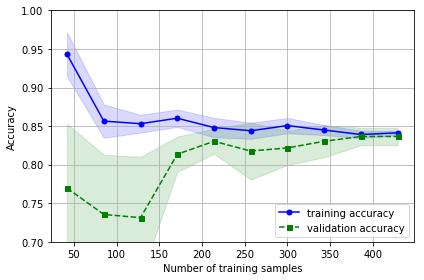

In [69]:
import matplotlib.pyplot as plt

if Version(sklearn_version) < '0.18':
    from sklearn.learning_curve import learning_curve
else:
    from sklearn.model_selection import learning_curve


pipe_tree = Pipeline([('scl', StandardScaler()),
                    ('clf', DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0))])


train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_tree,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()

## Bagging:Building an ensemble of classifiers from bootstrap samples

In [70]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# max_depth=None
tree2 = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None)

bag = BaggingClassifier(base_estimator=tree2,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

In [71]:
from sklearn.metrics import accuracy_score

tree2 = tree2.fit(X_train, y_train)
y_train_pred = tree2.predict(X_train)
y_test_pred = tree2.predict(X_test)

tree2_train = accuracy_score(y_train, y_train_pred)
tree2_test = accuracy_score(y_test, y_test_pred)
print('Decision tree2 train/test accuracies %.3f/%.3f'
      % (tree2_train, tree2_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Decision tree2 train/test accuracies 1.000/0.751
Bagging train/test accuracies 1.000/0.805


# 8.Pickle classification models

## Pickle dump the classifiers

In [72]:
import pickle
import os
import re

dest = os.path.join('classifier', 'pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)

pickle.dump(ppn, open(os.path.join(dest, 'ppn.pkl'), 'wb'), protocol=4)
pickle.dump(lr, open(os.path.join(dest, 'lr.pkl'), 'wb'), protocol=4)
pickle.dump(svm, open(os.path.join(dest, 'svm.pkl'), 'wb'), protocol=4) 
pickle.dump(tree, open(os.path.join(dest, 'tree.pkl'), 'wb'), protocol=4) 
pickle.dump(forest, open(os.path.join(dest, 'forest.pkl'), 'wb'), protocol=4) 
pickle.dump(knn, open(os.path.join(dest, 'knn.pkl'), 'wb'), protocol=4) 



## Pickle load the classifiers

In [73]:
#please refer to the app.py program in the ./classifier directory